<a href="https://colab.research.google.com/github/IKSAE/AIFFEL_quest_cr/blob/master/MainQuest/Main02/Untitled7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

목차 )
       1. 포켓몬데이터 불러오기
       2. 데이터 살펴보기
       3. 전설포켓몬과 일반포켓몬 차이 알아보기
       4. 베이스라인 만들기
       5. 모델 학습시키기
       6. 피쳐 엔지니어링 으로 데이터 학습시켜보기

```



In [6]:
#1. 포켓몬데이터 불러오기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print('슝=3')
import os
csv_path = "/content/Pokemon.csv"
original_data = pd.read_csv(csv_path)
print('슝=3')

슝=3
슝=3


In [7]:
pokemon = original_data.copy()
print(pokemon.shape)  #데이터 크기 출력
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [8]:
# 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)    # legendary 데이터 크기 출력
legendary.head()          #5줄 출력


(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [9]:
# Q. 일반 포켓몬의 데이터셋도 만들어봅시다.
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)
print(ordinary.shape)       # ordinary 데이터크기 출력
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [10]:
# 2 데이터 살펴보기
#빈 데이터 확인
pokemon.isnull().sum()  #결측치 처리

,0
#,0
Name,0
Type 1,0
Type 2,386
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0


In [11]:
print(len(pokemon.columns))    #전체컬럼 이해하기
pokemon.columns                #컬럼이 13개

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [12]:
len(set(pokemon["#"]))   # 집합의 크기가 800이 아니라 721이므로 중복이 있음을 알수있다

721

In [13]:
pokemon[pokemon["#"]== 6]              # 6의 포켓몬은 3개로 나뉨 x,y


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [15]:
len(set(pokemon["Name"]))  #이름 중복확인하기

800

In [16]:
#포켓몬 속성
pokemon.loc[[6,10]]
len(list(set(pokemon["Type 1"]))),len(list(set(pokemon["Type 2"])))    #타입1은 18가지 타입2는 19가지

(18, 19)

In [17]:
set(pokemon["Type 2"]) - set(pokemon["Type 1"])    #둘의 차집합이  NaN이므로   나머지 18가지 속성은 타입1 타입2모두 같은 데이터가 들어가있음을 알수있음

{nan}

In [18]:
types = list(set(pokemon["Type 1"]))    #모든 타입을 타입변수에저장
print(len(types))
print(types)

18
['Normal', 'Rock', 'Fire', 'Bug', 'Psychic', 'Electric', 'Dark', 'Water', 'Flying', 'Ghost', 'Ground', 'Fairy', 'Grass', 'Ice', 'Dragon', 'Steel', 'Poison', 'Fighting']


In [19]:
pokemon["Type 2"].isna().sum()      # 386개의 포켓몬은 속성을 하나만 가지고 나머지는 두개의 속성을 가짐

386

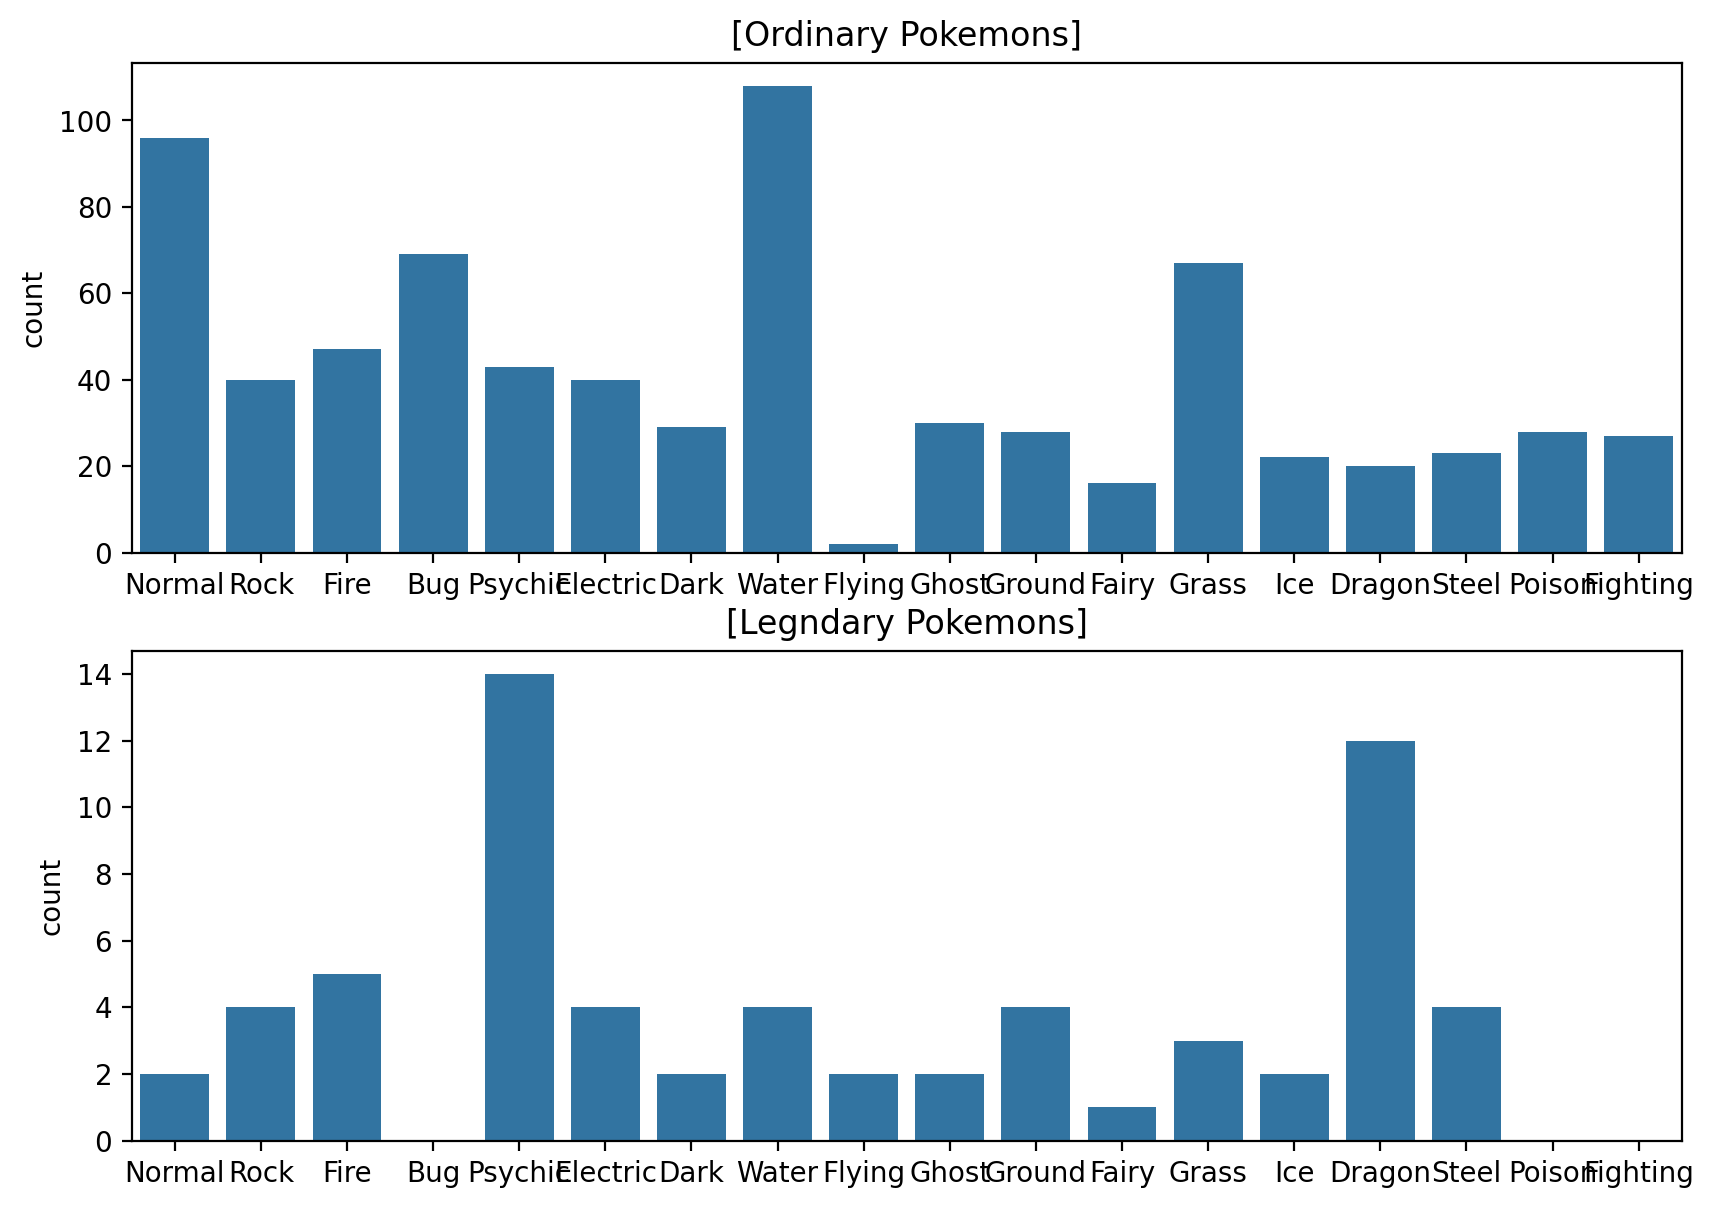

In [21]:
## Type 1 데이터 분포 plot

plt.figure(figsize=(10, 7))       #일반 포켓몬과 전설의 포켓몬 속성분포를 확인.전설의 포켓몬은 수가 매우 적기때문에 시각화를 통해 확인



plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legndary Pokemons]")

plt.show()

In [22]:
pd.pivot_table(pokemon, index = "Type 1",values = "Legendary").sort_values(by=["Legendary"],ascending =False)   #Legendary 비율이 가장높은 속성이 Flying임을 알수있고 날아다니는 ㅍ켓몬의 높은비율로 전설의 포켓몬

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


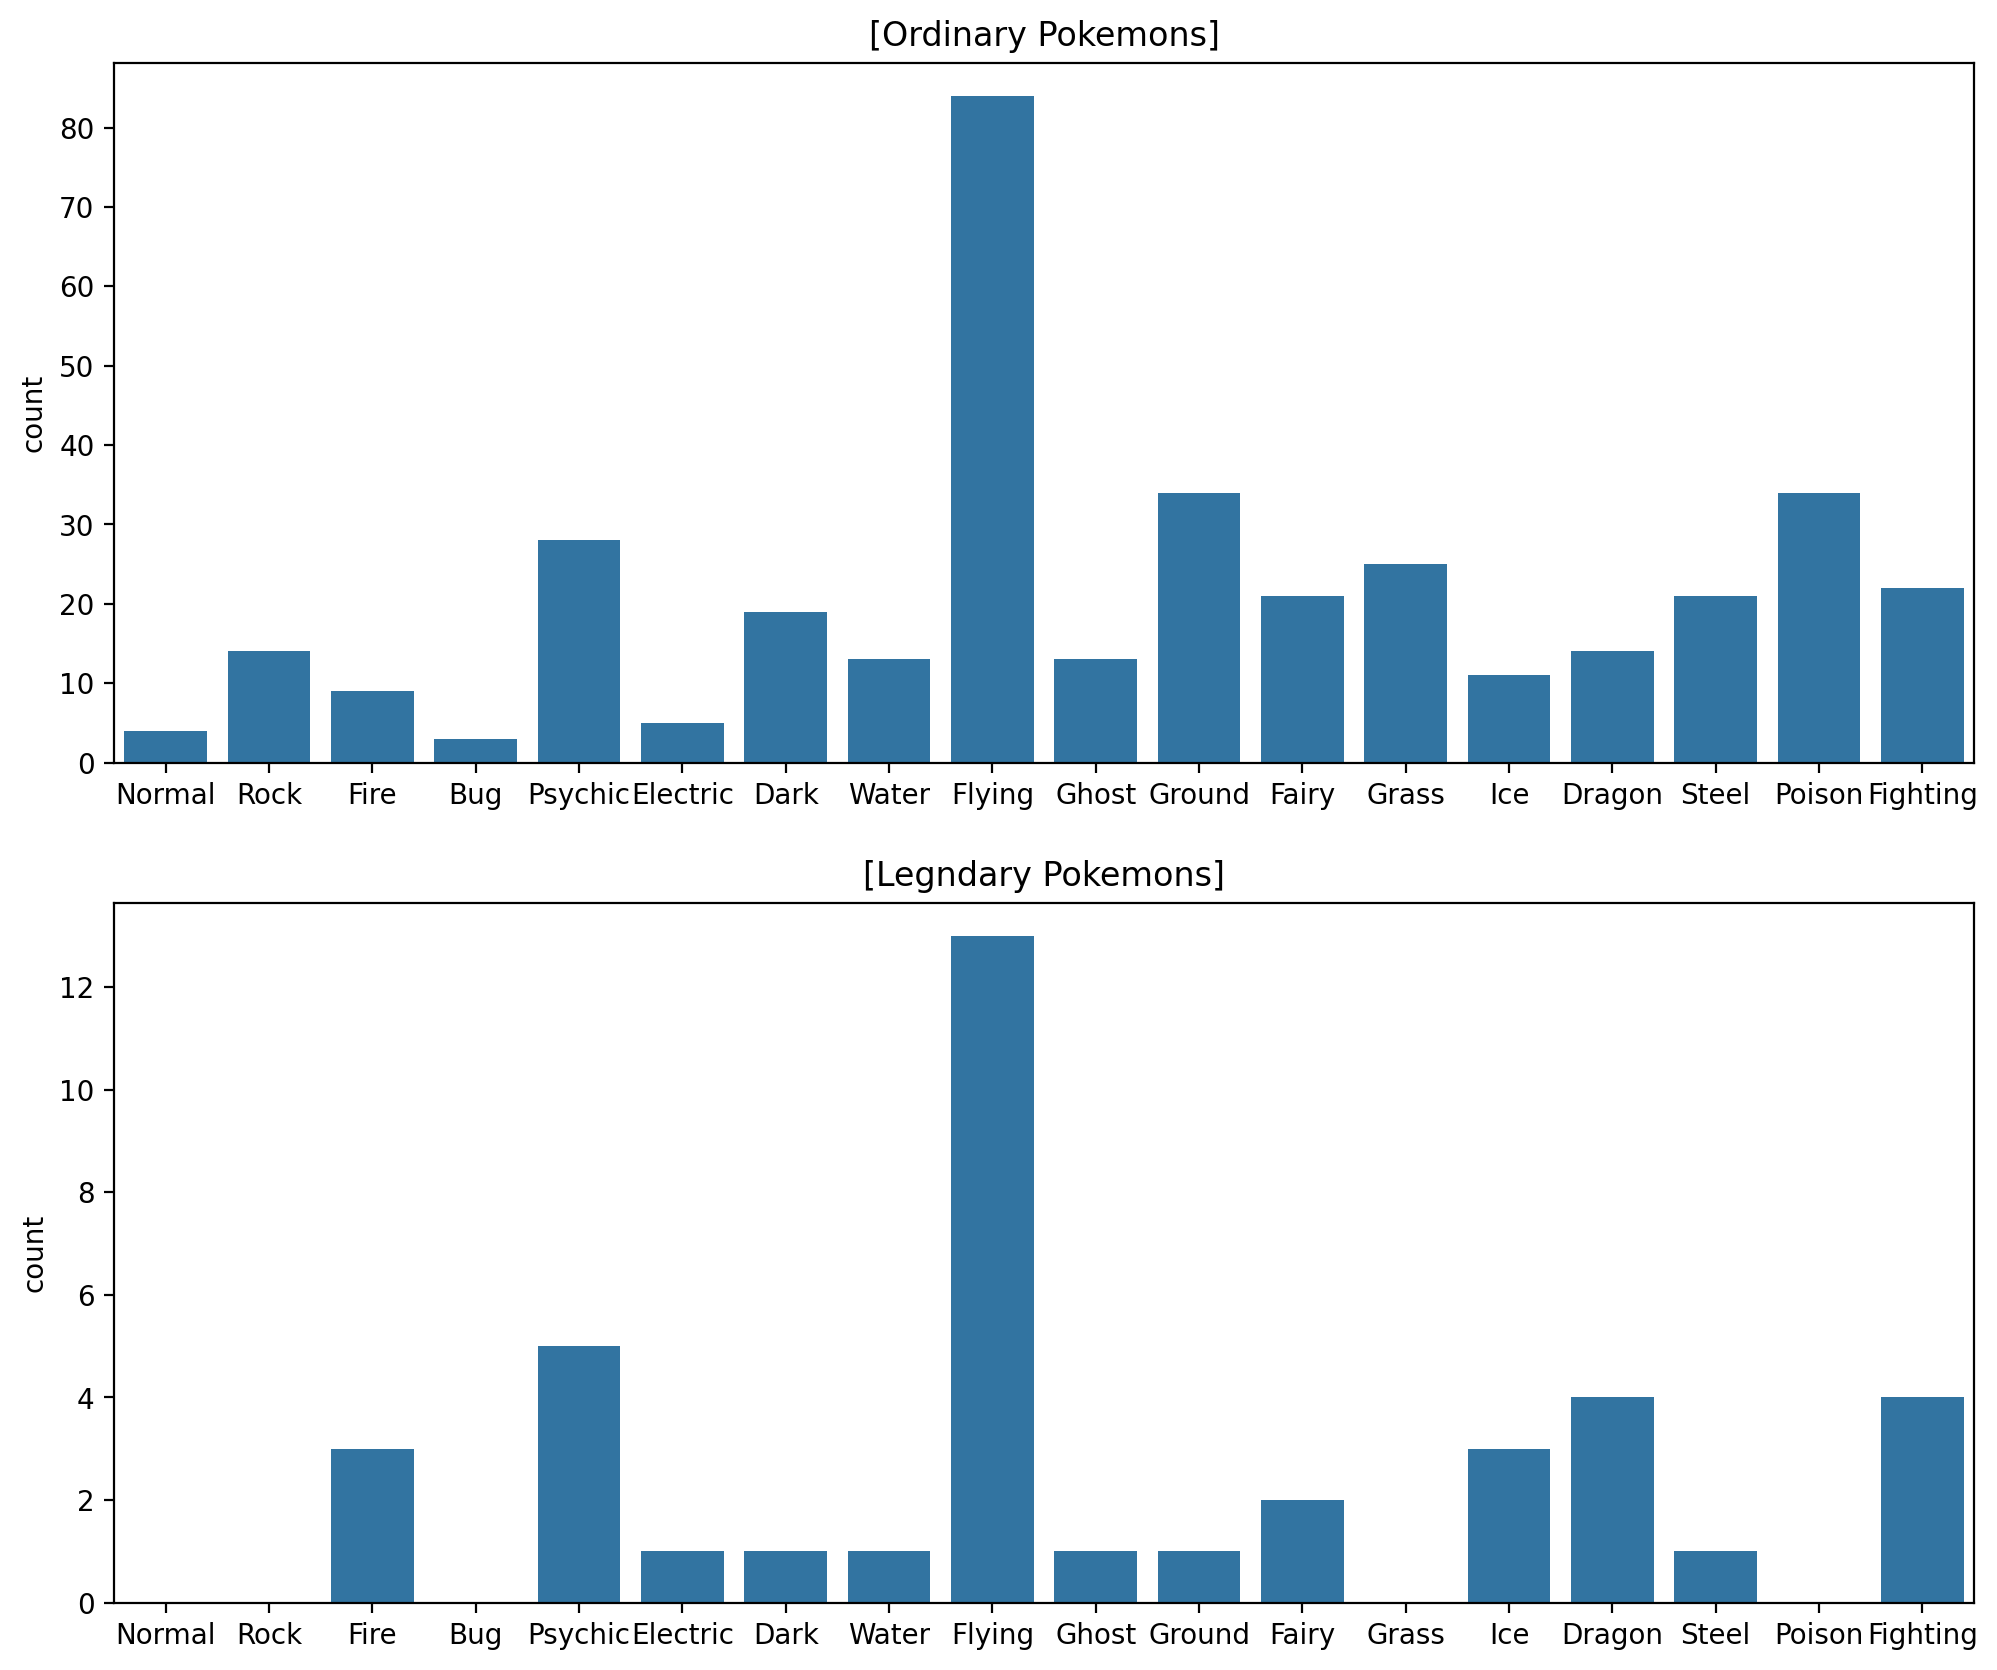

In [23]:
plt.figure(figsize=(12, 10))       #Flying속성의 경우 두경우 다 많지만 일반포켓몬에는 Grass rock posion 같은 속성이 많은 반면 전설의 포켓몬은 하나도 없음



plt.subplot(211)
sns.countplot(data=ordinary, x="Type 2", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 2", order=types).set_xlabel('')
plt.title("[Legndary Pokemons]")

plt.show()                                  # 여전히 Dragon,Psychic,Fighting 같은 속성이 많음

In [26]:
pd.pivot_table(pokemon, index = "Type 2",values = "Legendary").sort_values(by=["Legendary"],ascending =False)     #불속성이 25프로로 가장 높음을 확인

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


In [27]:
# 모든 스탯의 총합

In [28]:
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]     #모든 스탯의 종류를 stats 변수에 저장하기
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [29]:
# 실제 6개의 스탯과 데이터에 제공된 Total이 맞는지 확인하기
print("#0 pokemon: {}\n".format(pokemon.loc[0, "Name"]))
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon: Bulbasaur

total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


In [30]:
#pokemon['Toral'].values 와 pokemonp[stats].values 의 총 합이 같은 포켓몬의 수 확인
sum(pokemon['Total'].values == pokemon[stats].values.sum(axis=1))     #total 값과 stats의 총합이 같은 포켓몬은 전체 데이터의 수와같은 800마리인걸 확인가능

800

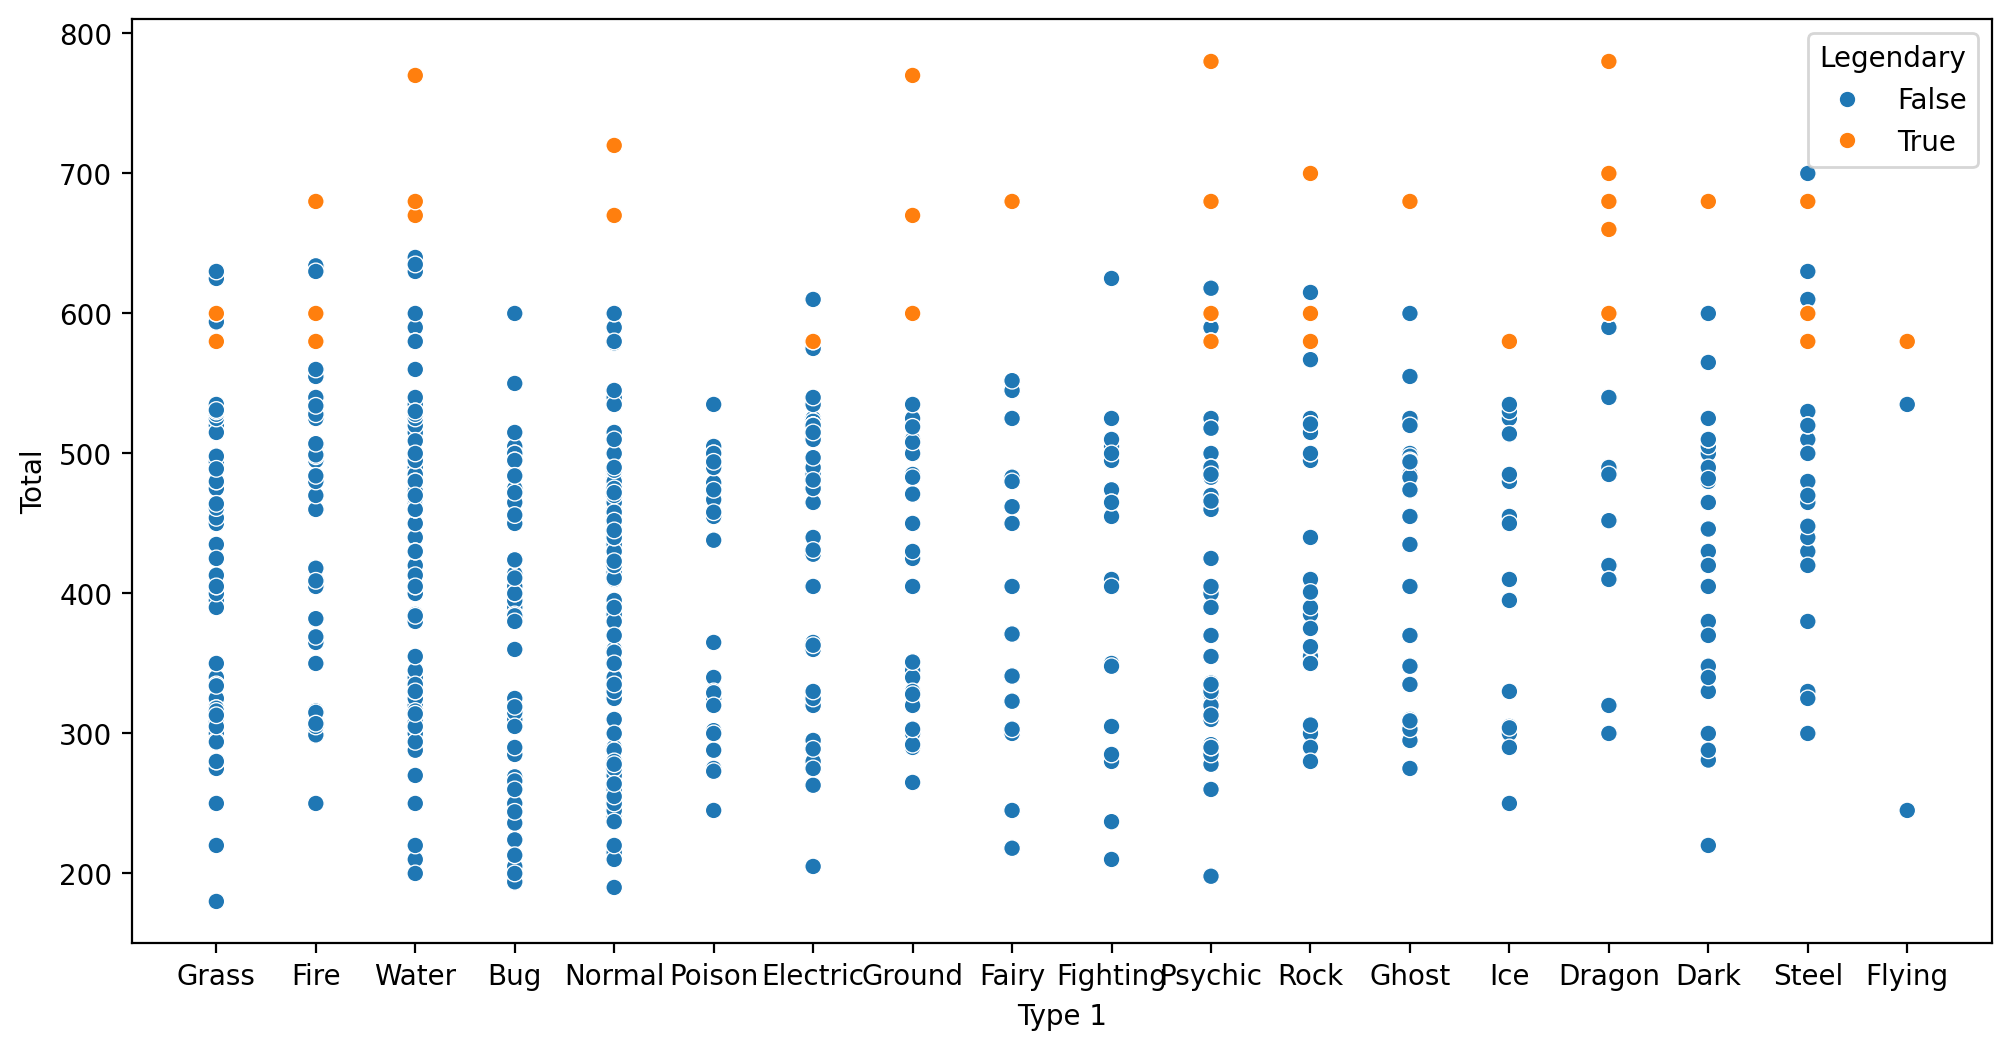

In [31]:

# total 값과 legendaryy 의 관계가 있는지확인

fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")     #Legendary 여부에 따라 색깔(hue)을 다름  점의 색깔을 보면 Type 1별로 total을 확인햇을떄 전설포켓몬은 total 스탯 값이 높다는것을 확인
plt.show()


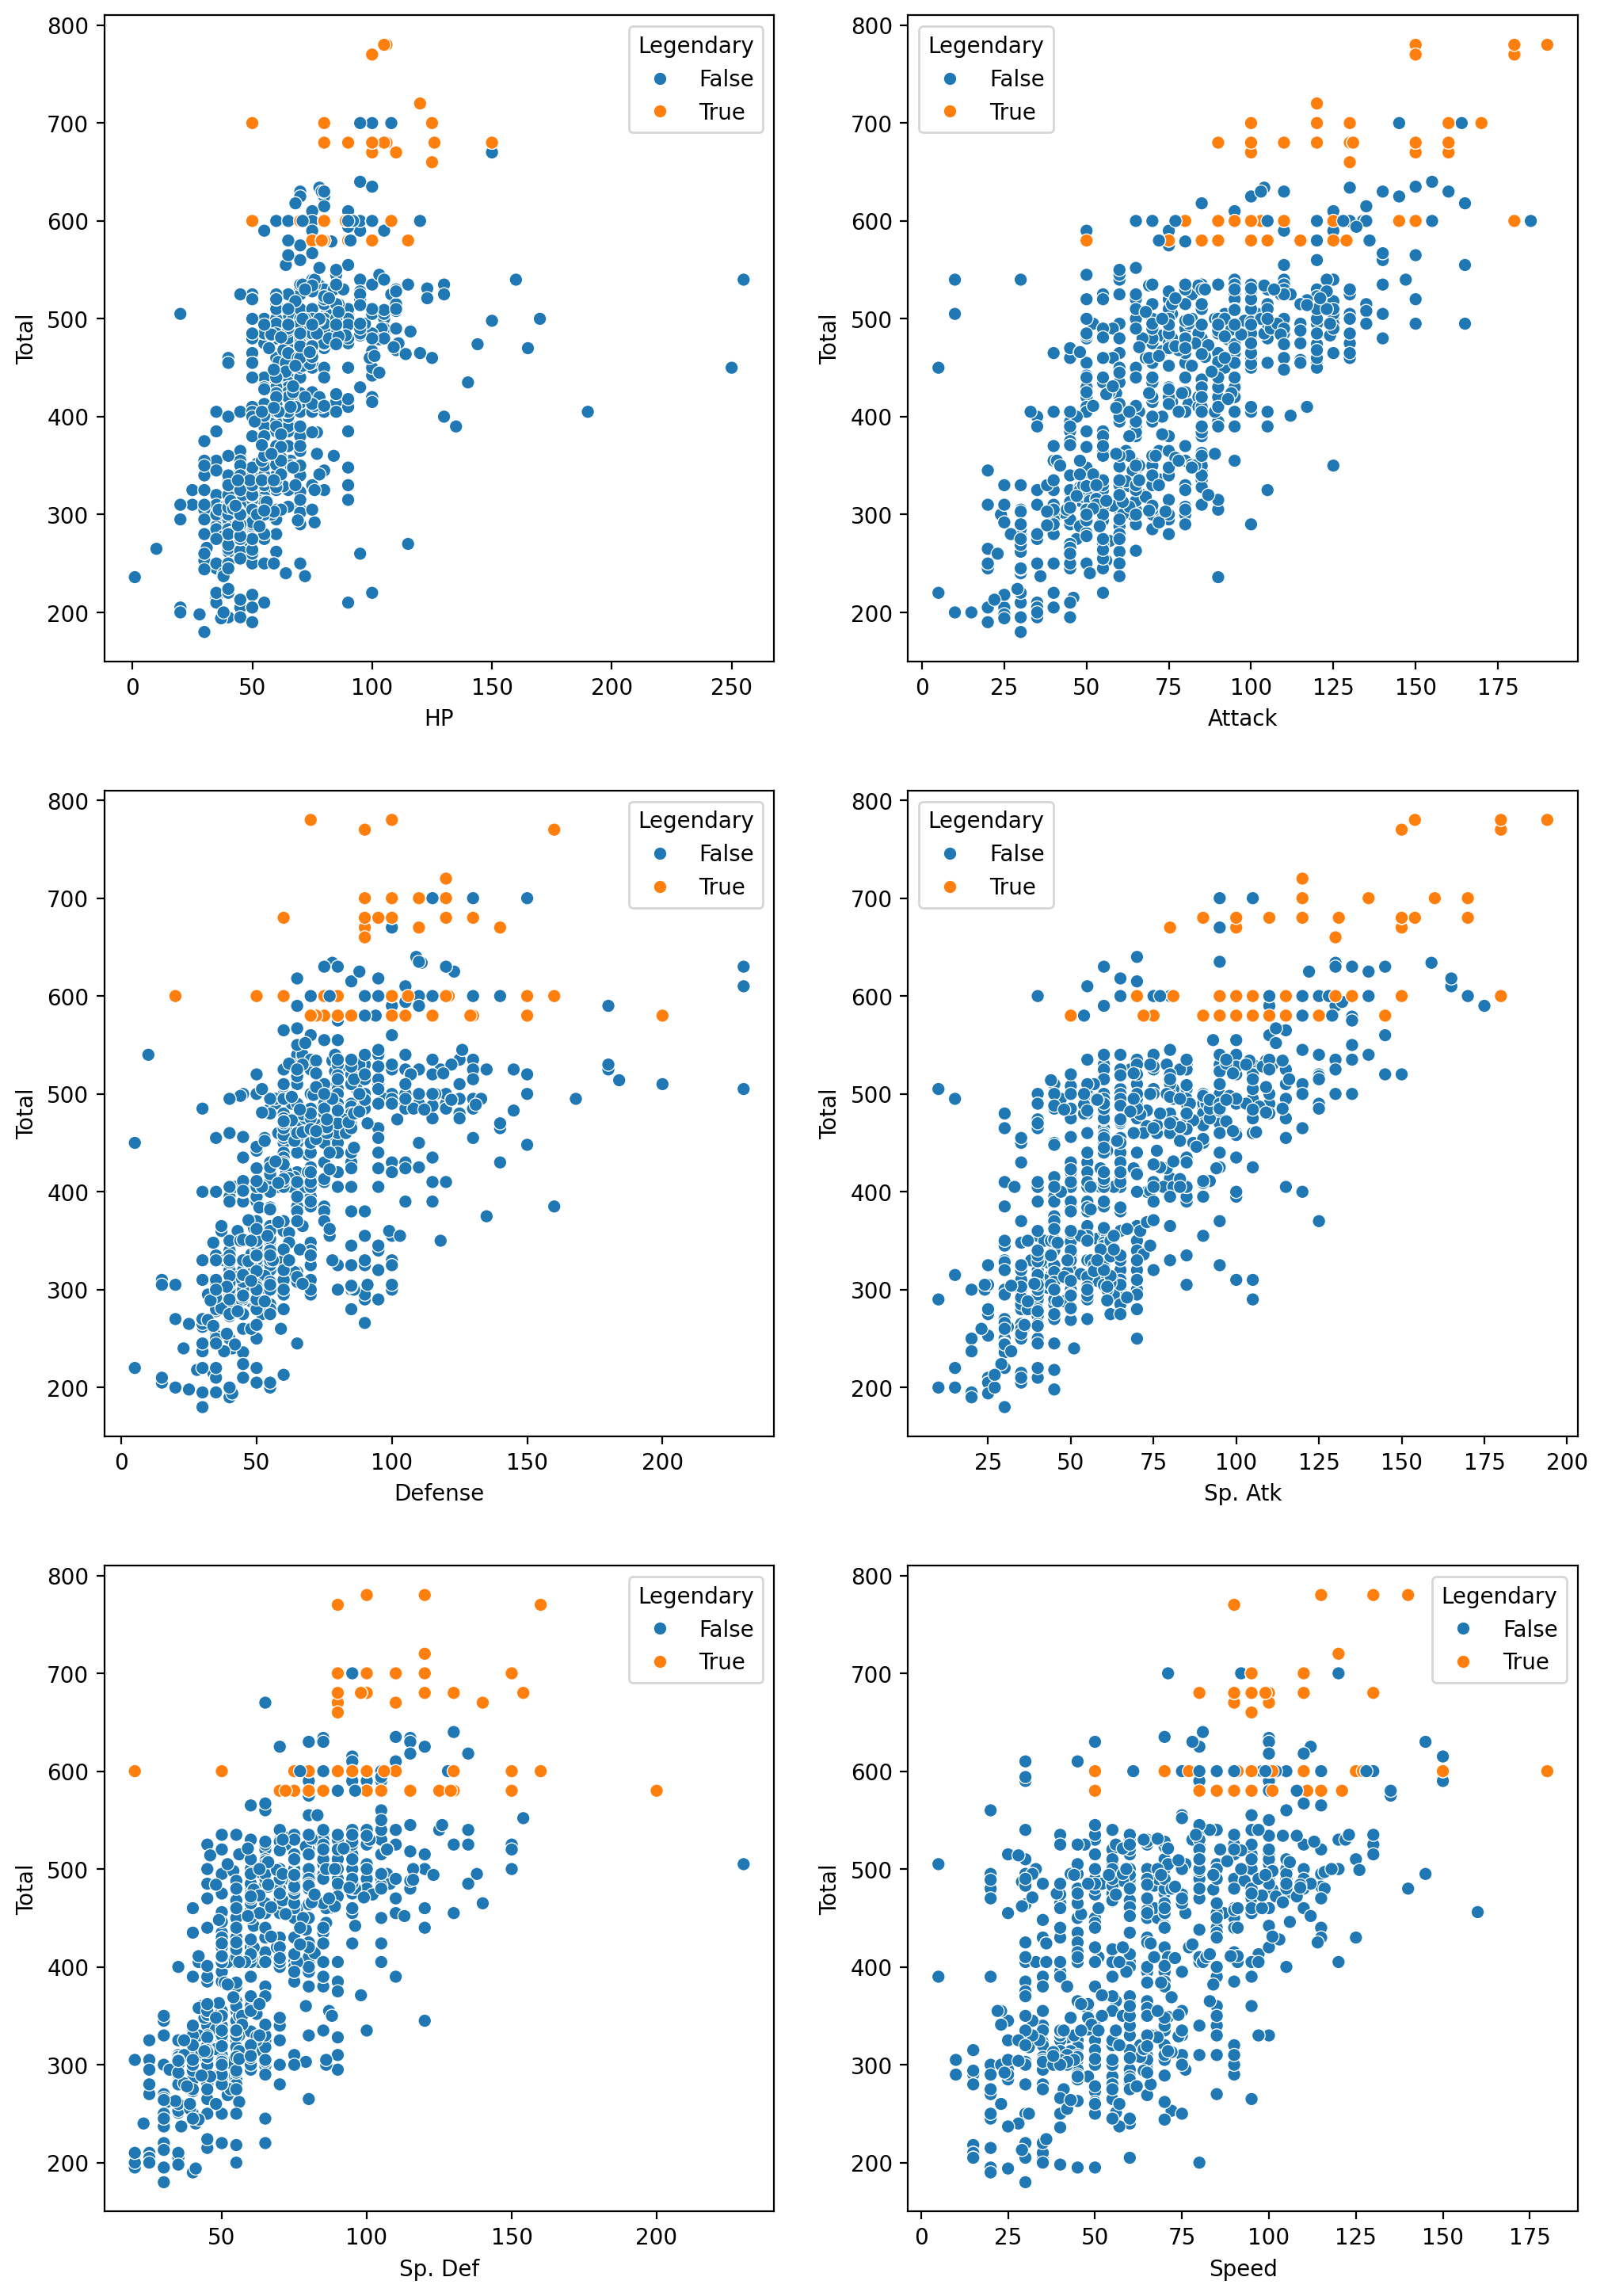

In [33]:
# 각의 스탯 값은 어떻게 분포 되이쓴ㄴ지 확인
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(12, 18)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)
plt.show()

In [34]:
##  hp,defense,Sp. Def
##전설의 포켓몬은 주로 높은 스탯을 갖지만, 이 세 가지에서는 일반 포켓몬이 전설의 포켓몬보다 특히 높은 몇몇 포켓몬이 있다,
##그러나 그 포켓몬들도 Total 값은 특별히 높지 않은 것으로 보아 특정 스탯만 특별히 높은, 즉 특정 속성에 특화된 포켓몬으로 보임

##Attack, Sp. Atk, Speed
##이 세 가지 스탯은 Total과 거의 비례하고 전설의 포켓몬이 각 스탯의 최대치를 차지하고 있습니다.

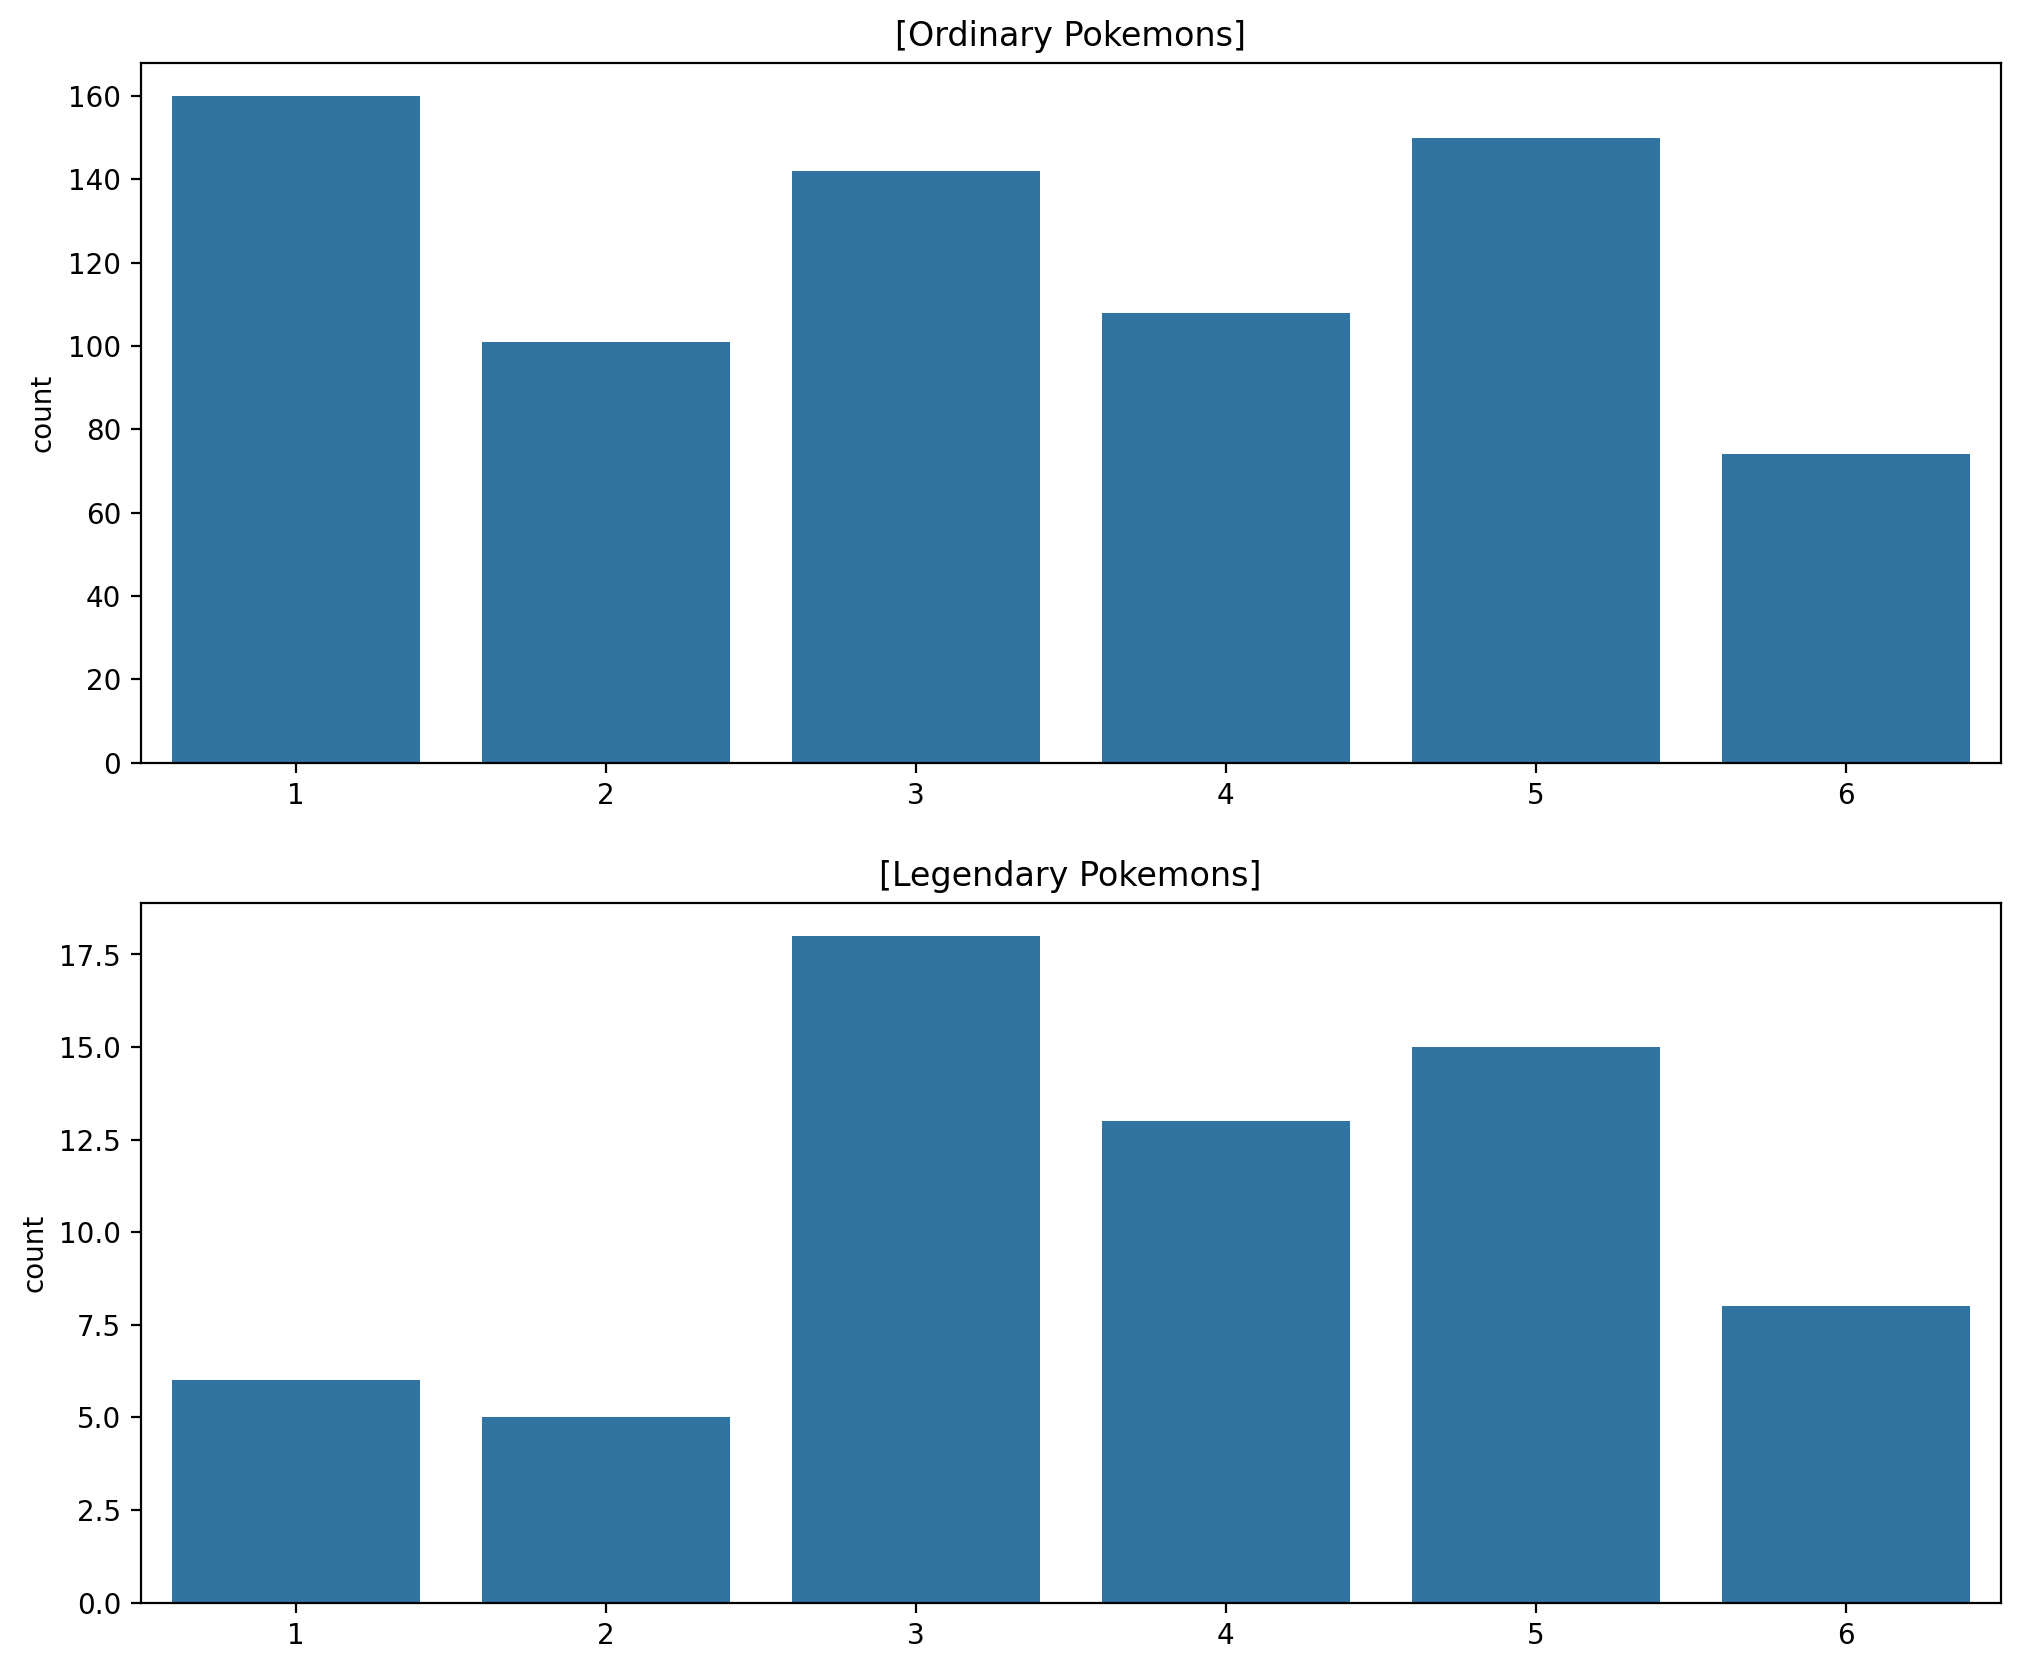

In [35]:
# Generation 각 포켓몬의 세대
#각세대 포켓몬의수 확인하기

plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[Ordinary Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

In [36]:
##전설의 포켓몬은 1, 2세대에는 많지 않았다가 3세대부터 많아졌다가, 6세대에 다시 줄어든 것을 확인가능

In [37]:
## legendary 포켓몬과 Ordinary 포켓몬을 분리해서 각각 분석


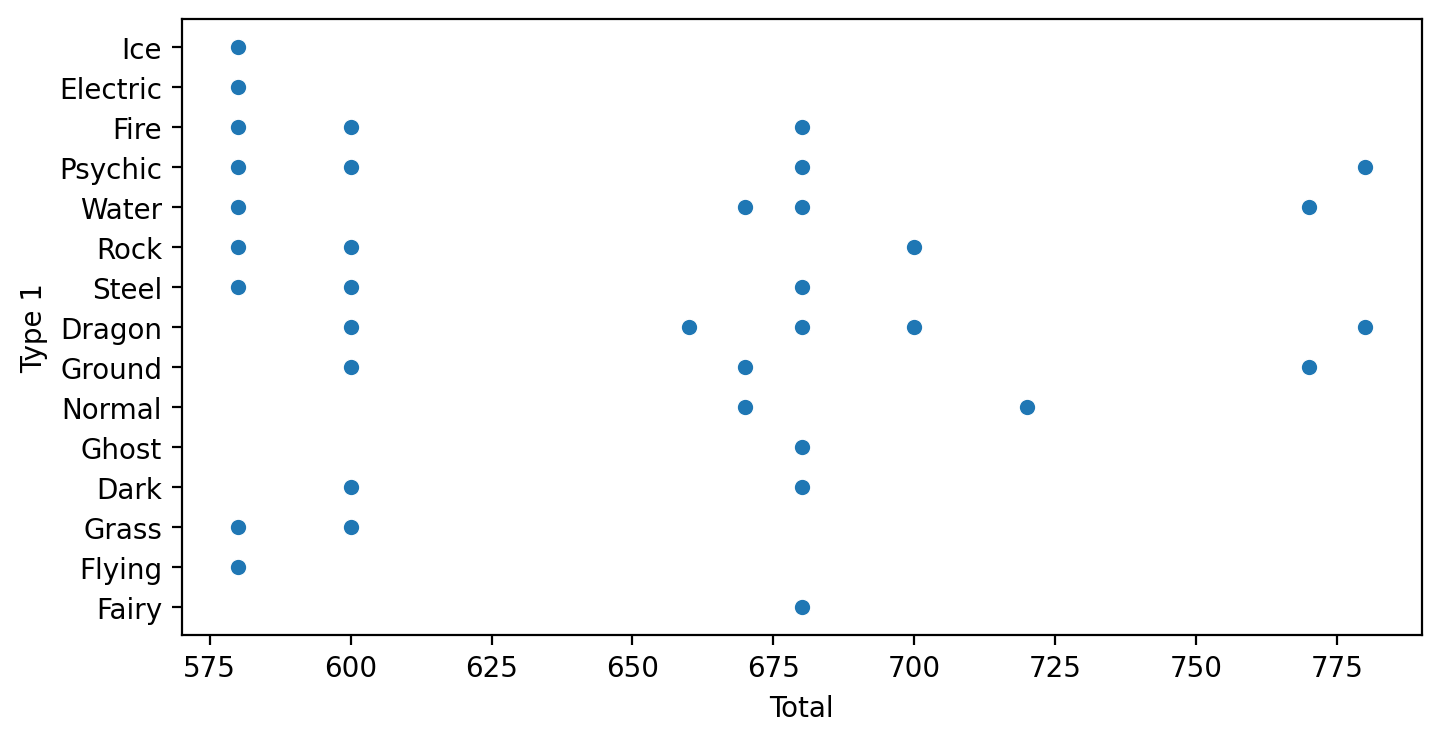

In [38]:
# 3. 전설포켓몬과 일반포켓몬 차이 알아보기
# 전설 포켓몬의 total 값
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")   #전설의 포켓몬들의 Total 값을 속성(Type 1)별로 확인
plt.show()                                               #전설의 포켓몬들의 total값이 600과 같은 특정한값에 몰려있는것이 확인

In [39]:
print(sorted(list(set(legendary["Total"]))))      # 실제 전설의 포켓몬들의 total값을 출력하기


[580, 600, 660, 670, 680, 700, 720, 770, 780]


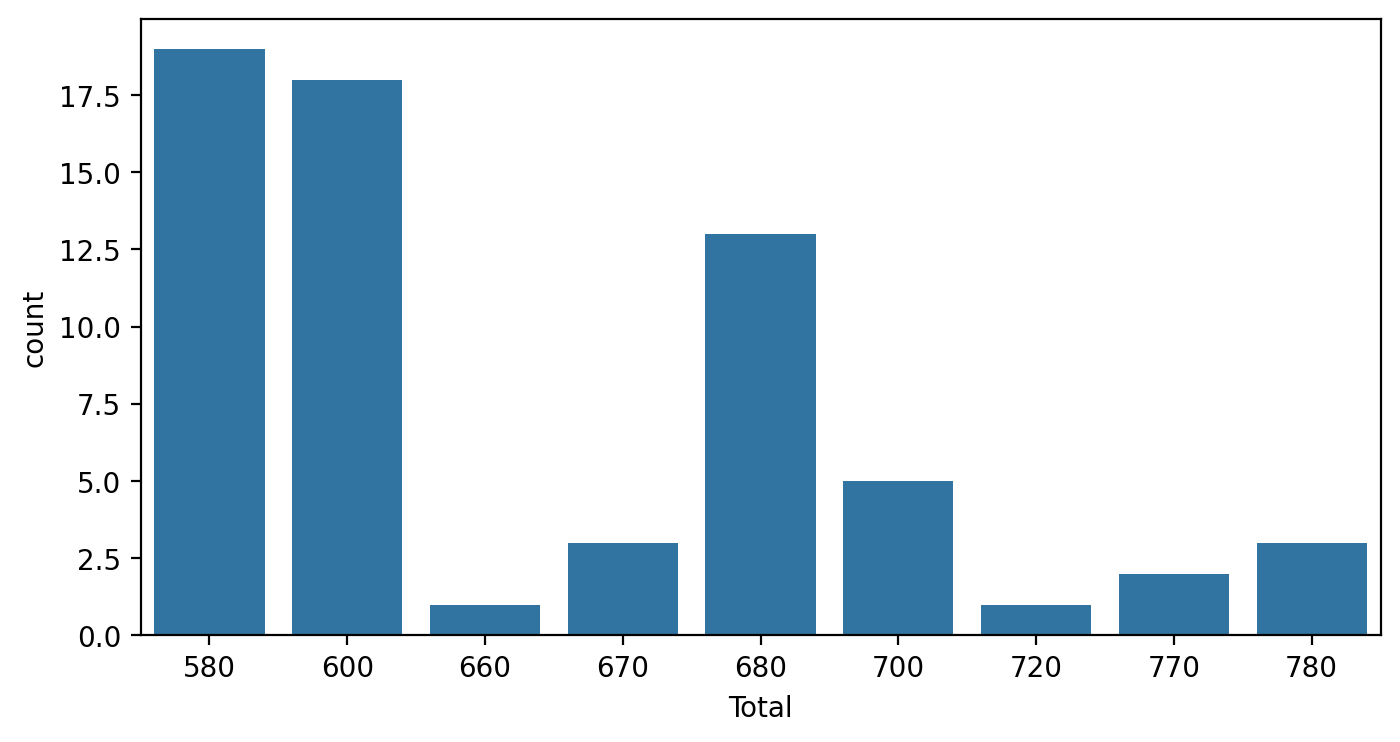

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total")           # Total값에 대한 포켓몬 수를 확인하기
plt.show()

In [42]:
round(65 / 9, 2)  #  총 65마리의 전설의 포켓몬이 9개의 Total만을 가진다는것은 7.22마리 끼리는 같은 스탯값을 가진다느의미와같다

7.22

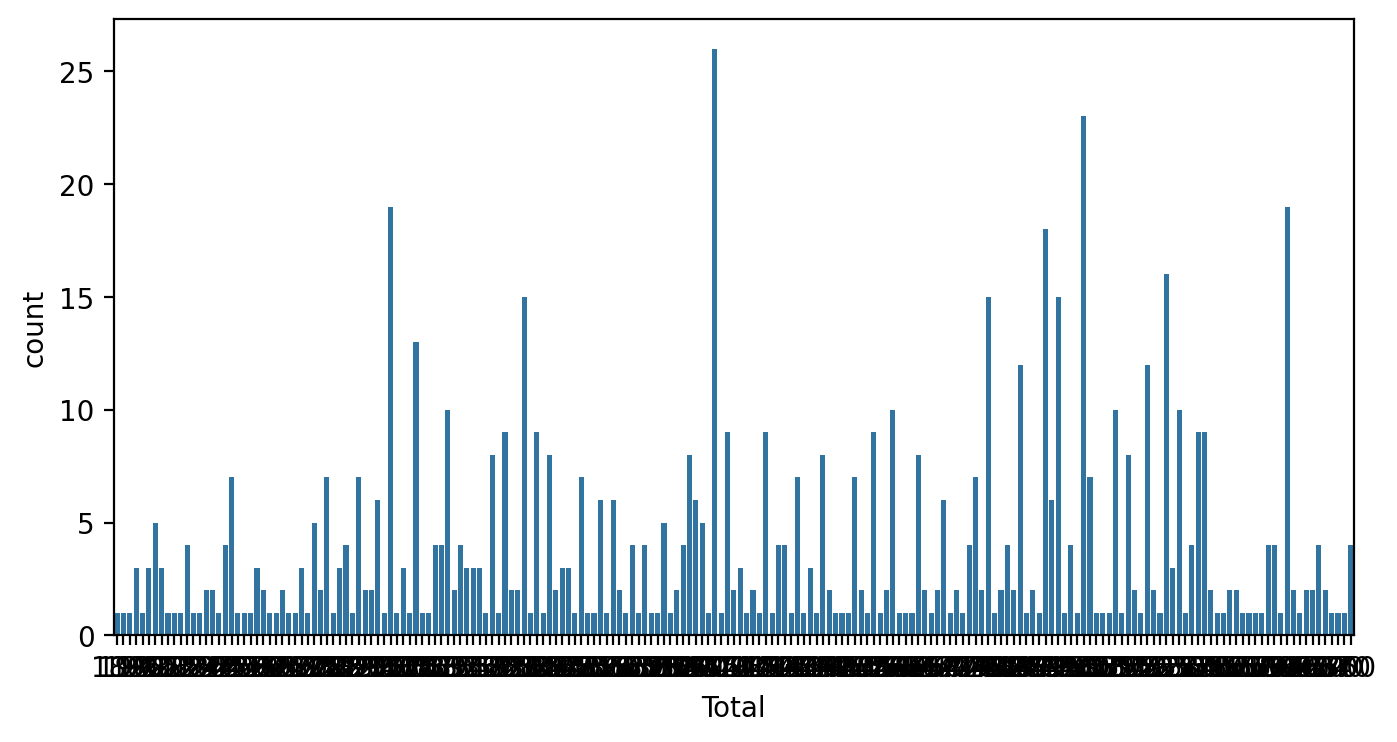

In [43]:
#ordinary 포켓몬의 'Total' 값 집합
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=ordinary, x="Total")
plt.show()

In [46]:
 #이 집합의 크기(길이)를 확인
len(sorted(list(set(ordinary["Total"]))))

195

In [47]:
##일반 포켓몬은 총 195가지의 Total 속성값을 가지고, 전체 일반 포켓몬은 (800 - 65), 즉 735마리임
round(732 / 195, 2)          # 3.77마리만 같은 total 스탯값을 가짐

3.75

In [48]:
##Total값의 다양성은 일반 포켓몬이 전설의 포켓몬보다 두 배 가까이 됩니다. 즉 전설의 포켓몬의 Total값은 다양하지 않습니다.
: 한 포켓몬의 Total 속성값이 전설의 포켓몬의 값들 집합에 포함되는지의 여부는 전설의 포켓몬임을 결정하는 데에 영향을 미칩니다.

또한, 전설의 포켓몬의 Total 값 중에는 일반 포켓몬이 가지지 못하는 Total값이 존재합니다. ex) 680, 720, 770, 780
: Total값은 전설의 포켓몬인지 아닌지를 결정하는 데에 이러한 방식으로도 영향을 미칠 수 있습니다.

즉, Total값은 legendary인지 아닌지를 예측하는 데에 중요한 컬럼일 것이라는 결론을 내릴 수 있습니다.

SyntaxError: unmatched ')' (<ipython-input-48-02dd4935d197>, line 4)

In [49]:
#전설의 포켓몬들의 이름을 보면, 특정 단어가 들어가 있는 이름, 또는 긴 이름을 가진 경우가 많음을 확인할수 있다

n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)             #concat으로 합쳐주기
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


In [50]:
#"MewTwo", "Latias", "Latios", "Kyogre", "Groudon", "Rayquaza", "Kyurem" 등의 포켓몬은 비슷한 이름을 가진 포켓몬이 다수 존재하고 forme가 들어가는 여러 전서포켓몬이 있는경우도 존재

formes = names[13:23]
formes                       #이름에 forme이 들어가면 전설의포켓몬일 확률 높음

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True


In [51]:
#전설의 포켓몬은 이름의 길이도 긴 경우가 많음
#데이터셋에 이름 길이 컬럼을 생성해서 비교해 보기
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [52]:
#일반포켓몬 데이터 name_count 추가하기
ordinary['name_count'] = ordinary['Name'].apply(lambda i: len(i))
ordinary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


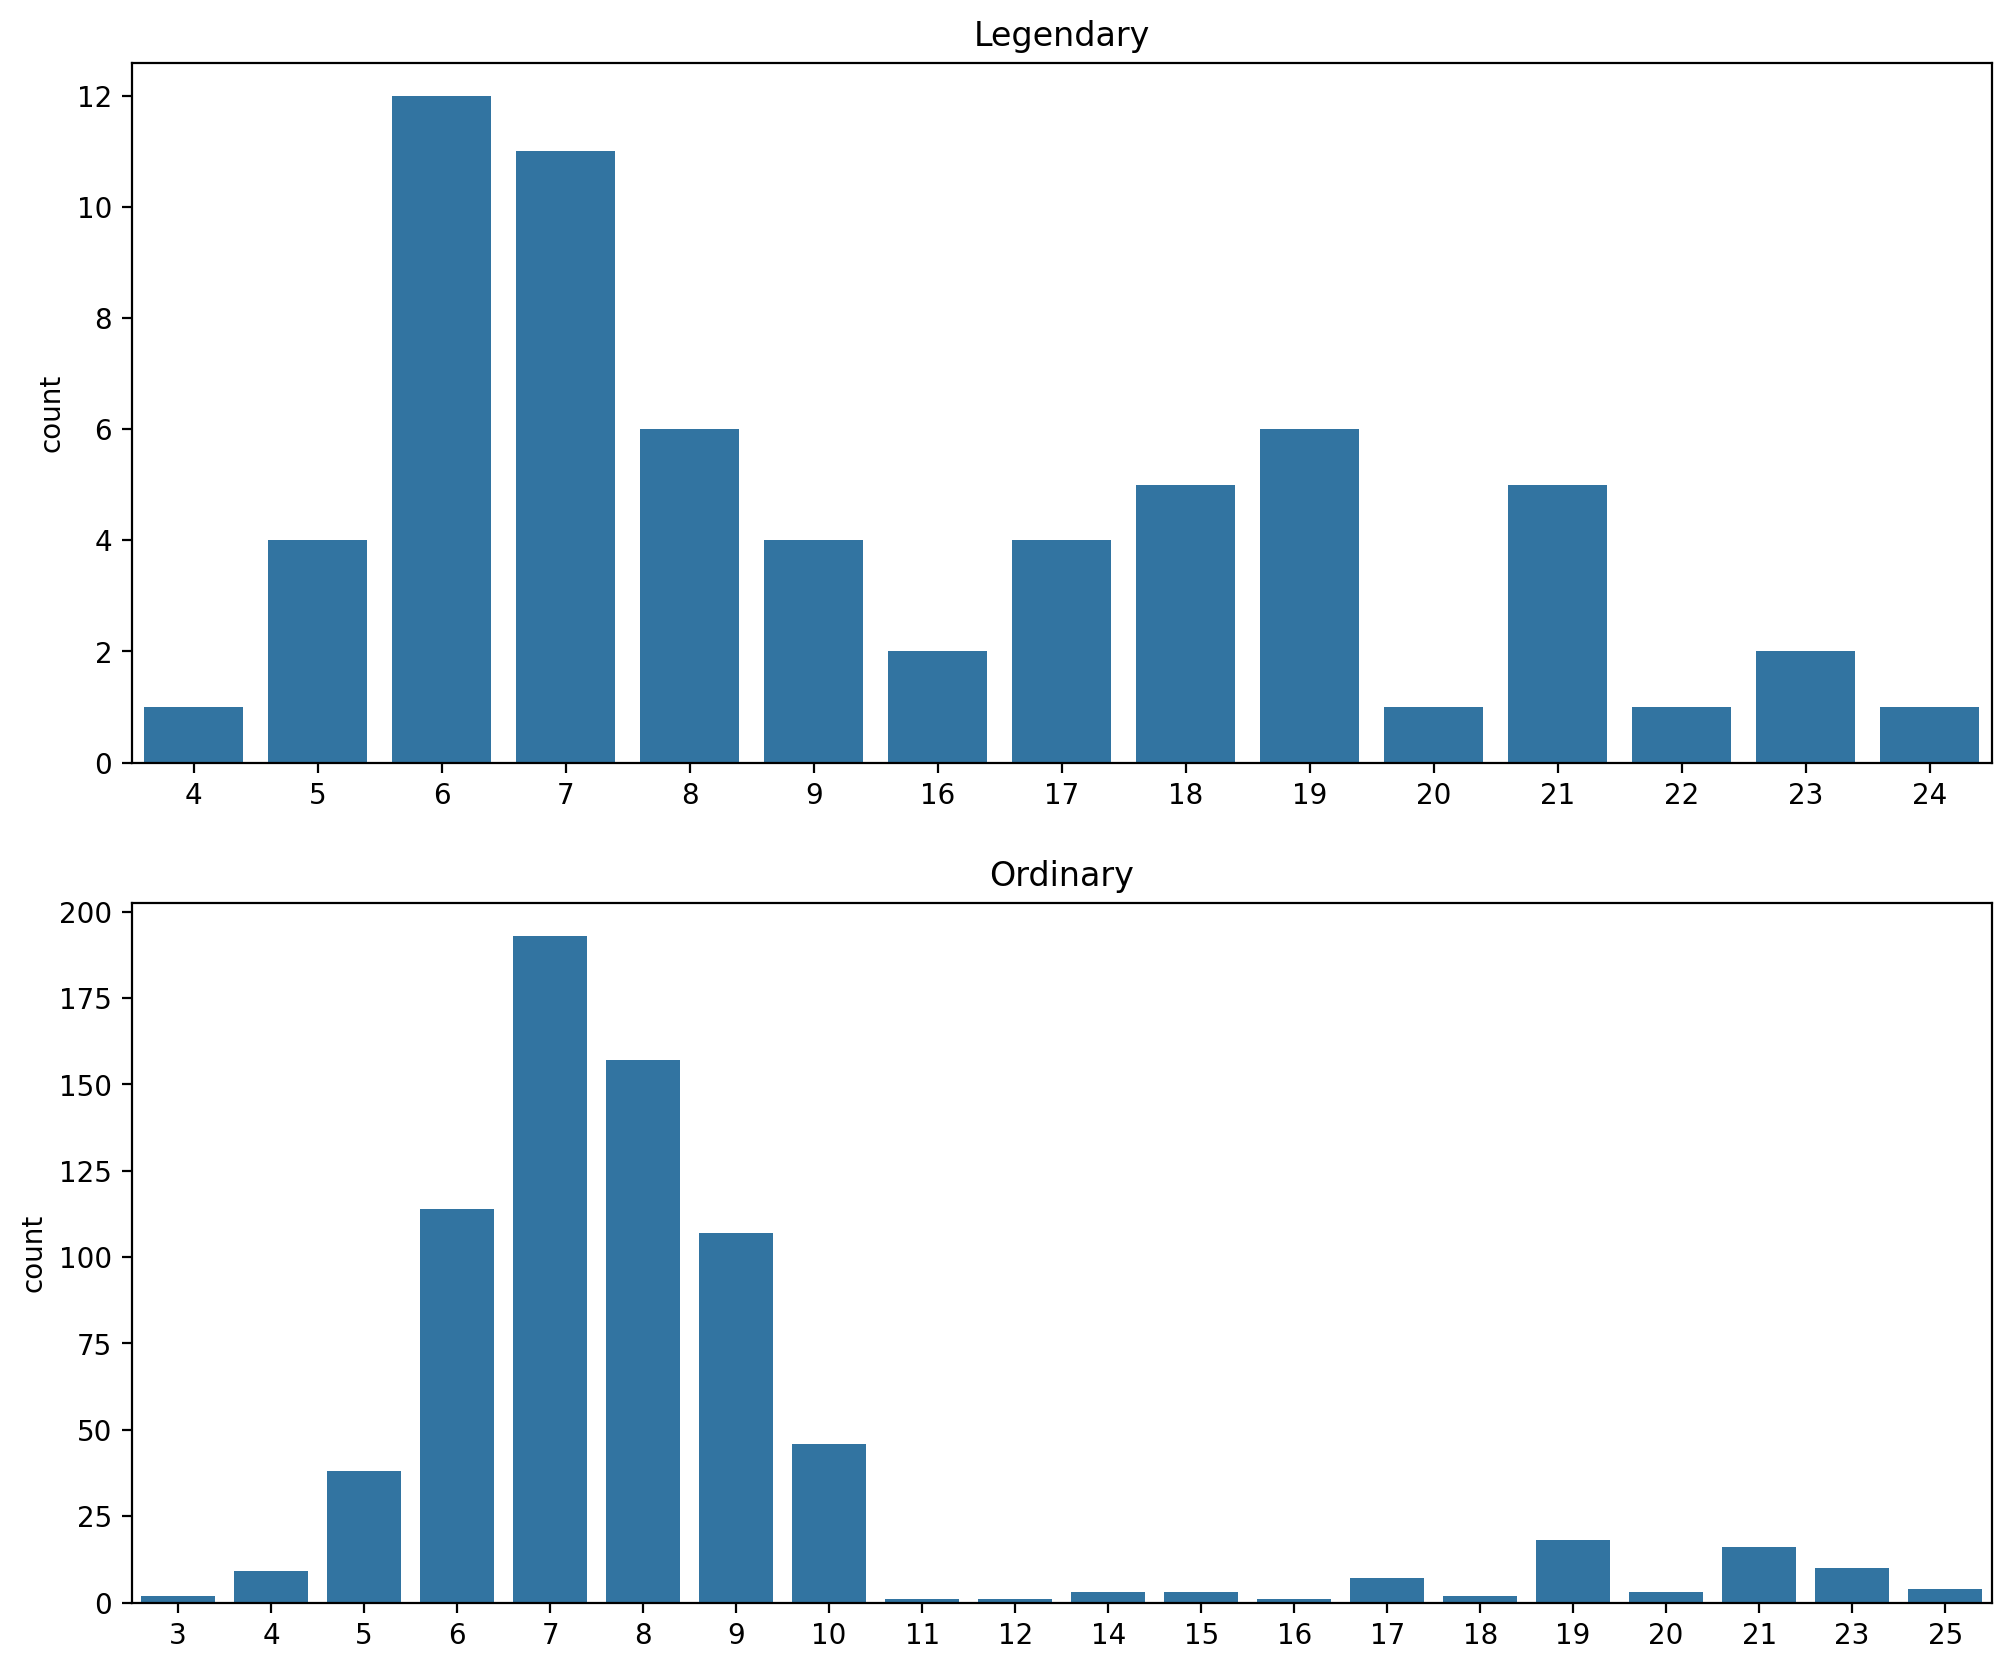

In [53]:
#name_count 컬럼은 어떤 특징을 갖는기 그래프로 확인하기
plt.figure(figsize=(12, 10))

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

In [54]:
##전설의 포켓몬은 16 이상의 긴 이름을 가진 포켓몬이 많은 반면, 일반 포켓몬은 10 이상의 길이를 가지는 이름의 빈도가 아주 낮은것을 확인가능

In [55]:
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")    #전설의포켓몬 이름이 10이상일 확률

41.54 %


In [56]:
print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%") #일반포켓몬 이름이 10이상일 확률

15.65 %


In [57]:
## 전설의 포켓몬의 이름이 10이상일 확률은 41퍼고 일반포켓몬은 16퍼밖에 안됨을 알수있는데 이는 아주큰차이로 legendary인지 구분하는데 큰 의미가 있음

In [58]:
#3. 데이터 전처리하기
#데이터 전처리하기    머신러닝을 수행할 모델은 문자열 데이터를 처리할 수 없기 때문에 이를 적절한 숫자 데이터 또는 True, False를 나타내는 불대수등으로 전처리하는 과정이 필요

##이름의 길이 : name_count 컬럼을 생성 후 길이가 10을 넘는지 아닌지에 대한 categorical 컬럼을 생성

## 토큰 추출 : legendary 포켓몬에서 많이 등장하는 토큰을 추려내고 토큰 포함 여부를 원-핫 인코딩(One-Hot Encoding)으로 처리


In [59]:
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))   #이름의 길이를 확인할수있는 컬럼 생성
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


In [60]:
pokemon["long_name"] = pokemon["name_count"] >= 10    #길이가 10이상이면 True 아니면 False를 가지는 lone_name 컬럼
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


In [61]:
## 전설의 포켓몬을 분류하는데 이름의길이값을 가진 name_count컬럼과 long_name중 뭐가 더 좋을지 모르기때문에 두가지 모두 활용

In [62]:
#전설의 포켓몬 이름에 가장 많이 쓰이는 토큰을 알아보고 이에 대한 새로운 컬럼을 만들기
#이름에 알파벳이 아닌 문자가 들어간 경우 전처리하기
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon.tail()


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,False,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True,DiancieMegaDiancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True,HoopaHoopaConfined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,True,HoopaHoopaUnbound
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,9,False,Volcanion


In [63]:
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())     #isalpha() 함수를 이용해 이름이 알파벳으로만 이루어졌는지 확인
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True


In [64]:
# 알파벳이 아닌 다른 문자가 이름에 포함된 것 살펴보기
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(9, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [65]:
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")        #9개 밖에 안되니 적당히 바꿔주기
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon Two")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon Two,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon Two,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [66]:
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon[pokemon["name_isalpha"] == False]                             # name_isalpha 컬럼이 False인 컬럼이 하나도 없음으로 모두 알파벳으로 됨

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha


In [72]:
# 이름을 띄어쓰기 & 대문자 기준으로 분리해 토큰화하기
import re

 #포켓몬 이름 CharizardMega Charizard X 을 쪼개서 리스트로 만들어보기

name = "CharizardMega Charizard X"

# 공백 기준으로 쪼개기
# split(" ") 사용
name_split = name.split(" ")
name_split

# 맨 처음 요소인 CharizardMega 를 Chaizard 와 Mega 로 나누기
# 대문자를 기준으로 분리
# CharizardMega 를 temp 변수에 우선 저장
temp = name_split[0]
temp

'CharizardMega'

In [73]:
# 대문자로 시작해서 소문자로 끝나는 토큰을 분리해야 함.
# 정규식의 `findall` 함수를 이용
tokens = re.findall('[A-Z][a-z]*', temp)    #[A-Z] : A부터 Z까지의 대문자 중 한 가지로 시작   [a-z] : 그 뒤에 a부터 z까지의 소문자 중 한 가지가 붙음,* : 그 소문자의 개수는 하나 이상인 패턴
    tokens.extend(a)
tokens

['Charizard', 'Mega']

In [74]:
tokens = []
for part_name in name_split:
    a = re.findall('[A-Z][a-z]*', part_name)
    tokens.extend(a)
tokens

['Charizard', 'Mega', 'Charizard', 'X']

In [75]:
#토큰화 과정을 모든이름에 적용시키도록 함수를 만들어 적용
def tokenize(name):
     name_split = name.split(" ")

     tokens = []
     for part_name in name_split:
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)

     return np.array(tokens)

In [76]:
#토큰화 해보기
name = "CharizardMega Charizard X"
tokenize(name)

array(['Charizard', 'Mega', 'Charizard', 'X'], dtype='<U9')

In [77]:
# 전설의 포켓몬 데이터에 적용시켜서 토큰을 모아보기
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

In [78]:
from collections import Counter   #counter 가져오기
a = [1, 1, 0, 0, 0, 1, 1, 2, 3]
Counter(a)

Counter(a).most_common()

[(1, 4), (0, 3), (2, 1), (3, 1)]

In [79]:
most_common = Counter(token_set).most_common(10)
most_common #어떤 토큰이 많이 쓰여있는지 찾기

[('Forme', 15),
 ('Mega', 6),
 ('Mewtwo', 5),
 ('Kyurem', 5),
 ('Deoxys', 4),
 ('Hoopa', 4),
 ('Latias', 3),
 ('Latios', 3),
 ('Kyogre', 3),
 ('Groudon', 3)]

In [80]:
# 설의 포켓몬 이름에 등장하는 토큰이 포켓몬의 이름에 있는지의 여부를 나타내는 컬럼을 만들기

In [81]:
for token, _ in most_common:
    # pokemon[token] = ... 형식으로 사용하면 뒤에서 warning이 발생합니다
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)     # str.contains  으로 특정 구문 포함되있는 여부확인가능

pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Forme,Mega,Mewtwo,Kyurem,Deoxys,Hoopa,Latias,Latios,Kyogre,Groudon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,True,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,True,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,False,False,False,False,False,False,False,False


In [82]:
print(types)
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)             #8개의 컬럼에 대해 원-핫 인코딩을 해주는 작업

pokemon[[["Type 1", "Type 2"] + types][0]].head()

['Normal', 'Rock', 'Fire', 'Bug', 'Psychic', 'Electric', 'Dark', 'Water', 'Flying', 'Ghost', 'Ground', 'Fairy', 'Grass', 'Ice', 'Dragon', 'Steel', 'Poison', 'Fighting']


,Type 1,Type 2,Normal,Rock,Fire,Bug,Psychic,Electric,Dark,Water,Flying,Ghost,Ground,Fairy,Grass,Ice,Dragon,Steel,Poison,Fighting
0,Grass,Poison,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
1,Grass,Poison,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
2,Grass,Poison,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
3,Grass,Poison,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
4,Fire,NaN,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [83]:
#4. 베이스라인 만들기
##가장 기본 데이터로 만드는 베이스라인(Baseline)

In [84]:
print(original_data.shape)     # 원본데이터 꺼내기
original_data.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [85]:
original_data.columns    #베이스라인을 만들려면 문자열은 빼야해서 컬럼확인하기

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [86]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation'] #의미없는 컬럼인 #와 name ,Type1,type2 데이터는 제외하고사용하고 타겟데이터인 legendary 도 제외

In [87]:
target = 'Legendary'  #타겟데이터인 레전더리도 변수에 저장

In [88]:
X = original_data[features]      #feature 컬럼에 해당하는 데이터를 변수X에 저장하기
print(X.shape)
X.head()

(800, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [89]:
y= original_data[target]       #target을 변수y에 저장하기
print(y.shape)
y.head()

(800,)


,Legendary
0,False
1,False
2,False
3,False
4,False


In [90]:
#5.모델 학습시키기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)      #훈련 데이터와 학습 데이터로 분리

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


In [91]:
from sklearn.tree import DecisionTreeClassifier    #의사결정 트리모델 불러오기
print('슝=3')

슝=3


In [92]:
model = DecisionTreeClassifier(random_state=25)     #random_state는 모델의 랜덤성을 제어
model

DecisionTreeClassifier(random_state=25)

In [93]:
model.fit(X_train, y_train)    #모델 학습시키기
y_pred = model.predict(X_test)
print('슝=3')

슝=3


In [94]:
#X_test를 입력받고 예측한 y_pred 값이 실제 정답인 y_test와 얼마나 비슷한지 채점하기
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[144,   3],
       [  5,   8]])

In [95]:
##TN (True Negative) : 옳게 판단한 Negative, 즉 일반 포켓몬을 일반 포켓몬이라고 알맞게 판단한 경우입니다.
##FP (False Positive) : 틀리게 판단한 Positive, 즉 일반 포켓몬을 전설의 포켓몬이라고 잘못 판단한 경우입니다.
##FN (False Negative) : 틀리게 판단한 Negative, 즉 전설의 포켓몬을 일반 포켓몬이라고 잘못 판단한 경우입니다.
##TP (True Positive) : 옳게 판단한 Positive, 즉 전설의 포켓몬을 전설의 포켓몬이라고 알맞게 판단한 경우입니다.

In [97]:
len(legendary)
##800마리중 65마리만 전설이고 나머지는 일반포켓몬 800마리를 전부 다 일반 포켓몬으로 예측하더라도, 735마리는 일단 맞히고 들어간다는 것을 뜻합니다.
##즉, 아무런 학습을 안 하고 모든 답을 하나로 찍어도, 735 / 800 * 100 = 92%의 정확도를 달성할 수 있다는 거죠.따라서 이번 데이터셋에서는 정확도로 모델의 성능을 평가하는 것은 거의 의미가없음

65

In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



In [ ]:
#ecall이 낮다는 것은 분모에 있는 FN값이 높다는 것을 뜻합니다. 즉, 전설의 포켓몬인데 일반 포켓몬이라고 판단하는 경우가 많은것을 의미

In [99]:
#6. 피쳐 엔지니어링 으로 데이터 학습시켜보기
#피쳐 엔지니어링 데이터로 학습시키기

In [100]:
print(len(pokemon.columns))
print(pokemon.columns)

45
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_count',
       'long_name', 'Name_nospace', 'name_isalpha', 'Forme', 'Mega', 'Mewtwo',
       'Kyurem', 'Deoxys', 'Hoopa', 'Latias', 'Latios', 'Kyogre', 'Groudon',
       'Normal', 'Rock', 'Fire', 'Bug', 'Psychic', 'Electric', 'Dark', 'Water',
       'Flying', 'Ghost', 'Ground', 'Fairy', 'Grass', 'Ice', 'Dragon', 'Steel',
       'Poison', 'Fighting'],
      dtype='object')


In [101]:
#문자열 컬럼을 제외하고 모델 학습에 사용할 컬럼들만 추려서 features라는 변수에 저장하기
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

len(features)

38

In [102]:
target = "Legendary"        #정답데이터 저장하기
target

'Legendary'

In [103]:
X = pokemon[features]     #모델에 입력할 변수x지정
print(X.shape)
X.head()

(800, 38)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Dark,Fairy,Steel,Ghost,Psychic,Ice,Bug,Grass,Dragon,Fighting
0,318,45,49,49,65,65,45,1,9,False,...,False,False,False,False,False,False,False,True,False,False
1,405,60,62,63,80,80,60,1,7,False,...,False,False,False,False,False,False,False,True,False,False
2,525,80,82,83,100,100,80,1,8,False,...,False,False,False,False,False,False,False,True,False,False
3,625,80,100,123,122,120,80,1,21,True,...,False,False,False,False,False,False,False,True,False,False
4,309,39,52,43,60,50,65,1,10,True,...,False,False,False,False,False,False,False,False,False,False


In [104]:
y = pokemon[target]     #정답데이터 y 만들기
print(y.shape)
y.head()

(800,)


,Legendary
0,False
1,False
2,False
3,False
4,False


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)     #x_train부터 y_test까지 분리하기

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 38) (640,)
(160, 38) (160,)


In [107]:
model = DecisionTreeClassifier(random_state=25)   #의사결정트리
model

DecisionTreeClassifier(random_state=25)

In [ ]:
model.fit(X_train, y_train)     #train데이터를 학습시키기
y_pred = model.predict(X_test)    #test데이터로 예측값 얻기

In [108]:
confusion_matrix(y_test, y_pred)  #얼마나 비슷한지 채점하기

array([[144,   3],
       [  5,   8]])

In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



In [110]:
# recall값이 무려 0.92 까지 오른걸 확인가능

In [114]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.98      0.97      0.98       147
        True       0.71      0.77      0.74        13

    accuracy                           0.96       160
   macro avg       0.85      0.87      0.86       160
weighted avg       0.96      0.96      0.96       160



In [ ]:
# recall과 f1-score 부분에서 도 좋은 성능을 보이므로 랜덤포레스트 모델을 사용했을때 성능이 더 좋아졋다. 전처리 부분이 아직 헷갈려서 정리를 해봐야될거같다